El conjunto de datos que vamos a trabajar es el Wine Dataset, que contiene los resultados de un análisis químico de vinos.

Utilizaremos diversos modelos de clasificación para prever la clase o calidad del vino en función de sus características químicas. 

Antes de evaluar los modelos, realizaremos un preprocesado de los datos.

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.compose import ColumnTransformer


column_names = [ 'Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium',
                'Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins',
                'Color intensity','Hue','OD280/OD315 of diluted wines', 'Proline']

df = pd.read_csv("/Users/alexvalles/wineData.txt", sep=",",
                  encoding = 'ISO-8859-1', names=column_names)

df


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [105]:
df.shape # Constatamos que es un dataset de pequeñas dimensiones 178 filas x 14 columnas

(178, 14)

In [106]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [107]:
df.isnull().sum()   # comprobamos que no hay datos nulos.

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [108]:
df.Class.unique()

array([1, 2, 3])

In [109]:
frec_clase = df['Class'].value_counts()

frec_clase

Class
2    71
1    59
3    48
Name: count, dtype: int64

In [110]:
# Convertimos la columna 'Class' en categórica.

df['Class'] = df['Class'].astype('category')
df.dtypes

Class                           category
Alcohol                          float64
Malic acid                       float64
Ash                              float64
Alcalinity of ash                float64
Magnesium                          int64
Total phenols                    float64
Flavanoids                       float64
Nonflavanoid phenols             float64
Proanthocyanins                  float64
Color intensity                  float64
Hue                              float64
OD280/OD315 of diluted wines     float64
Proline                            int64
dtype: object

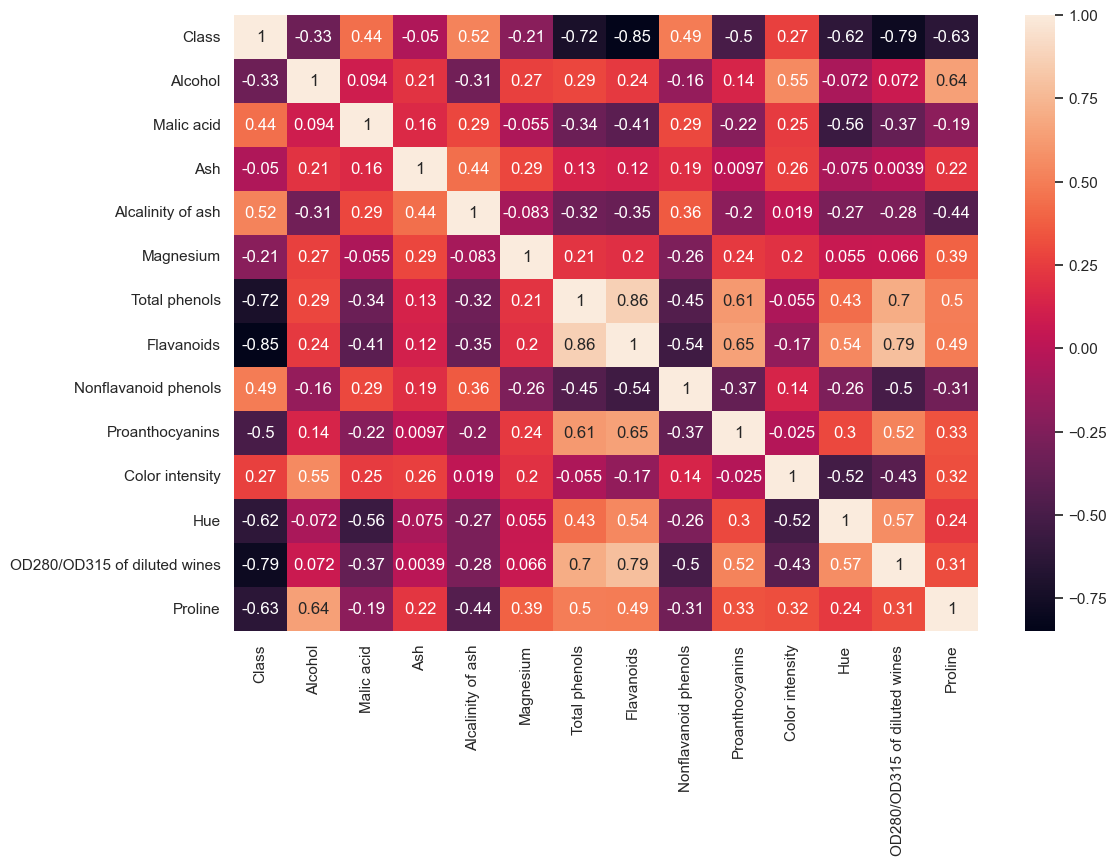

In [111]:
# Heatmap matriz de correlaciones

sns.heatmap(df.corr(),annot=True)
sns.set(rc={"figure.figsize": (12, 8)})

Aunque tenemos algunas variables con poca correlación con la clase, y que son menos relevantes para los modelos de clasificación, como son "Ash" o "Magnesium", por ejemplo, el conjunto de datos Wine es relativamente pequeño, con 178 observaciones y 13 variables. Teniendo esto en cuenta utilizaremos, en nuestros modelos, todas las variables sin preocuparnos demasiado por el coste computacional. Nuestros modelos siempre serán más precisos si trabajan con todas las características.

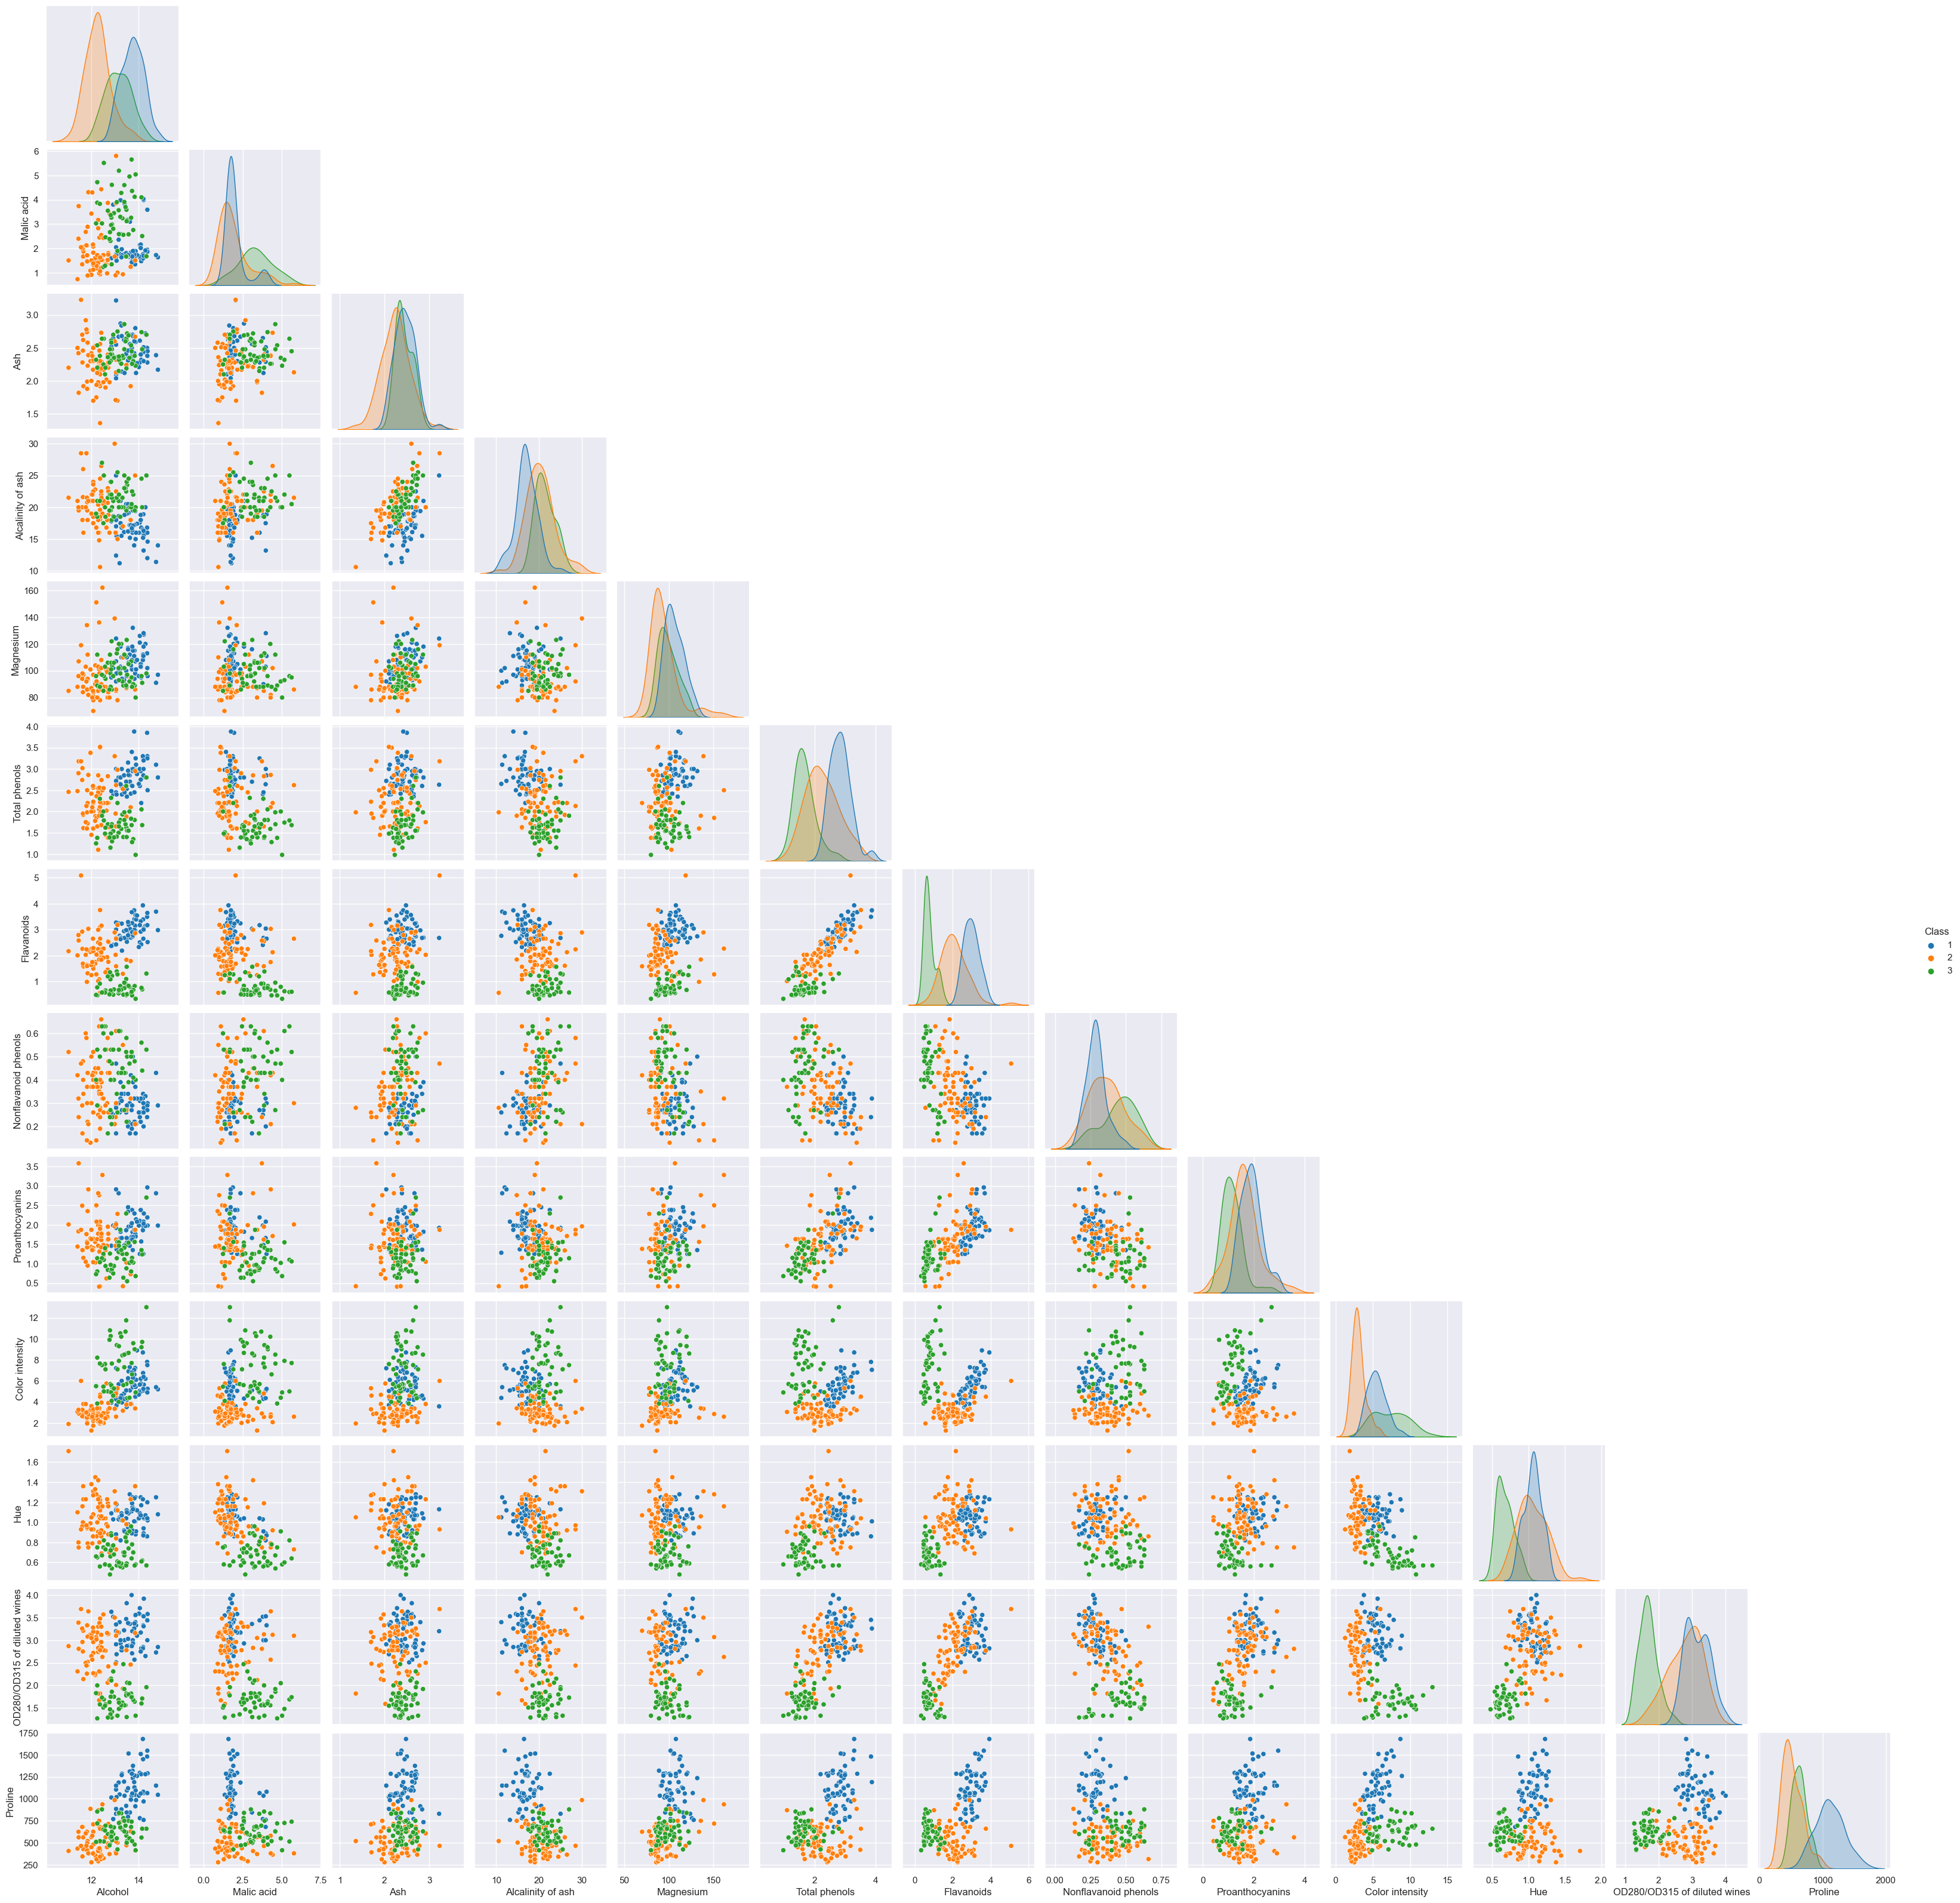

In [112]:
# Hacemos pairplot del dataset.

sns.pairplot(df, hue='Class', palette='tab10', diag_kind='kde', corner=True)


plt.show()

Algunas características separan bastante bien las clases. Por ejemplo, Proline parece ser una variable bastante explicativa en sí misma, especialmente para la clase 1 (puntos azules). También la intensidad del color, junto con los fenoles o flavonoides totales separa bien las clases.


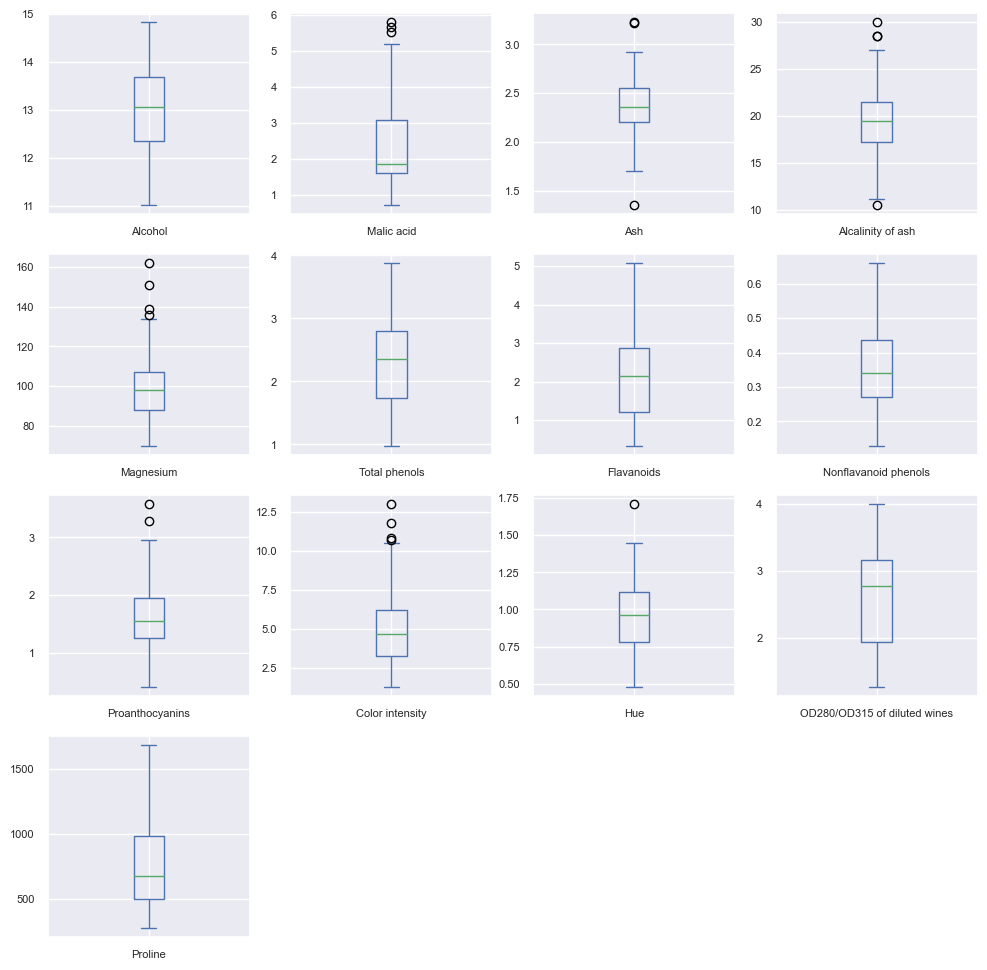

In [113]:
# Visualizamos las variables mediante boxplot. Vemos que en su mayoría no parecen tener una distribución normal y algunas también tienen outliers.

df.plot(kind='box',subplots=True, layout=(4,4), fontsize=8, figsize=(12,12));


Las variables no presentan distribuciones normales o gaussianas, a excepción de la variable "Alcalinity of ash", y se mueven en escalas diferentes.

Haremos un escalado de datos que adicionalmente también reducirá el efecto de los outliers, para así evitar que nuestro modelo puediera verse sesgado por la interacción de valores de diferentes escalas. 

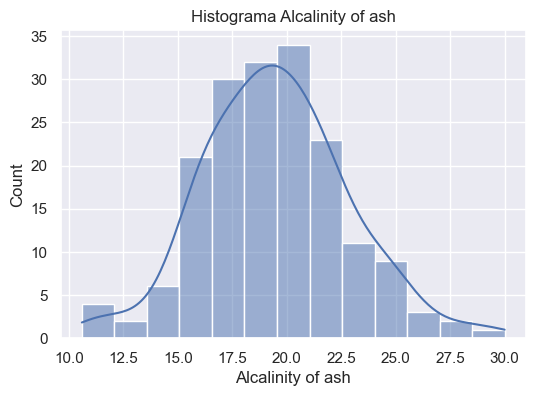

In [114]:
# La variable "Alcalinity of ash", es la única que presenta una distribución normal o gaussiana. Será escalada más adelante con Standard Scaler.

plt.figure(figsize=(6, 4))
sns.histplot(df['Alcalinity of ash'], kde=True)
plt.title('Histograma Alcalinity of ash')
plt.show()


### NOTA: 

El Sprint tiene 5 ejercicios marcados a seguir, pero que para su resolución se hace más intuitivo seguir otro orden. El orden que seguiremos para cada uno de los modelos de clasificación será el siguiente:


- Escalamos el dataframe, si el modelo lo requiere, aplicaremos posteriormente este dataframe escalado. (Ejercicio 5 - Proceso de ingeniería, por ejemplo escalado). Consta como el último ejercicio, pero escalaremos los datos previo a todo lo demás, para poder ya trabajar con valores uniformes. 
- División train test.
- Creamos el modelo (Ejercicio 1) (*)
- Entrenamos el modelo (5 modelos en total) (Ejercicio 2)
- Obtenemos matriz de confusión, y classification report. (Ejercicio 2)
- Mejoramos el modelo con GridSearchCV (seleccionando mejores parámetros).(Ejercicio 3)
- Entrenamos el modelo mejorado. (Ejercicio 3)
- Obtenemos matriz de confusión y class report del modelo mejorado. (Ejercicio 3)
- Comparamos modelo inicial con modelo mejorado.
- Realizamos valoración cruzada. Comparamos resultados. (Ejercicio 4)
- Comparamos el rendimiento de los distintos modelos (Ejercicio 4)



(*) Utilizaremos los siguientes 5 modelos:

- Decision Tree Classifier
- KNN Classifier
- Random Forest Classifier
- Support Vector Machines
- Logistic Regression


Deberemos escalar los datos de las variables para conseguir un rendimiento óptimo en los siguientes modelos de clasificación: KNN Classifier, Support Vector Machines y Logistic Regression.

Haremos el escalado utilizando Pipeline, ya que utilizaremos 3 tipos de escalado en función de la variable en cuestión.

Los modelos Decision Tree y Random Forest Classifier no son sensibles al escalado, de manera que no los entrenaremos con los datos escalados.

In [115]:
# variables que escalamos con MinMaxScaler (distribución no normal, sin outliers)
minmax_features = ['Alcohol', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'OD280/OD315 of diluted wines', 'Proline']

# Variables que escalamos con RobustScaler (distribución no normal con outliers)
robust_features = ['Malic acid', 'Ash', 'Magnesium', 'Proanthocyanins', 'Color intensity', 'Hue']

# Variable que escalamos con StandardScaler (distribución normal)
standard_features = ['Alcalinity of ash']

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('minmax', MinMaxScaler(), minmax_features),
        ('robust', RobustScaler(), robust_features),
        ('standard', StandardScaler(), standard_features)],
   
)

# Dejamos todo preparado para poder hacer directamente el pipeline en los modelos que necesitan estandarizar datos.

In [116]:
# Antes de empezar a trabajar con los modelos, hacemos la división train test

X = df.drop('Class', axis=1)  
y = df['Class'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
print("X train shape:", X_train.shape)
print("X test shape:", X_test.shape)
print("y train shape:", y_train.shape)
print("y test shape:", y_test.shape)

X train shape: (142, 13)
X test shape: (36, 13)
y train shape: (142,)
y test shape: (36,)


### ---> DECISION TREE CLASSIFIER

Los datos de las variables no necesitan ser escaladas en este modelo. 

In [118]:
# Modelo Decision Tree classifer 
classifier_tree = DecisionTreeClassifier()
# Entrenamos el modelo
classifier_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [119]:
#Predecimos respuesta test 

y_pred_ct = classifier_tree.predict(X_test)


In [120]:
# matriz de confusión

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_ct)
cnf_matrix

array([[13,  1,  0],
       [ 0, 14,  0],
       [ 1,  0,  7]])

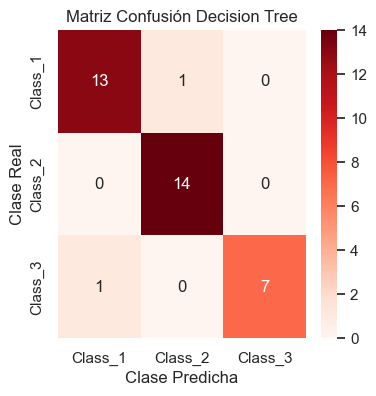

In [121]:
class_names = ['Class_1', 'Class_2', 'Class_3']

#heatmap matriz confusión

plt.figure(figsize=(4, 4))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap= 'Reds', xticklabels=class_names, yticklabels=class_names)


plt.title('Matriz Confusión Decision Tree')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

13 muestras de la clase 1 fueron clasificadas correctamente y 1 muestra de la clase 1 fue clasificada incorrectamente como clase 2.

Las 14 muestras de la clase 2 fueron clasificadas correctamente, sin errores.

Ninguna muestra de la clase 3 fue clasificada incorrectamente como clase 1, 1 muestra de la clase 3 fue clasificada incorrectamente como clase 2, y 7 muestras de la clase 3 fueron clasificadas correctamente.

In [122]:
from sklearn.metrics import classification_report
target_names = ['Class_1', 'Class_2', 'Class_3']
print(classification_report(y_test, y_pred_ct, target_names=target_names))

              precision    recall  f1-score   support

     Class_1       0.93      0.93      0.93        14
     Class_2       0.93      1.00      0.97        14
     Class_3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



El modelo tiene un buen rendimiento en la clasificación de las clases, con una precisión media del 94%. Vamos a ver si mejoramos el modelo con la modificación de hiperparámetros.

### Mejora del modelo:

In [123]:
classifier_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [124]:
from sklearn.model_selection import GridSearchCV

param_grid_ct = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [42]  
}

# configuramos búsqueda en cuadrícula
grid_search_ct = GridSearchCV(classifier_tree, param_grid_ct, cv=5, scoring='accuracy')

# búsqueda en cuadrícula 
grid_search_ct.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [42]},
             scoring='accuracy')

In [125]:
# mejor combinación de parámetros
best_params_ct = grid_search_ct.best_params_
print("Mejores parámetros:", best_params_ct)

# mejor modelo
best_ct = grid_search_ct.best_estimator_

Mejores parámetros: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}


In [126]:
# Realizamos predicciones en el conjunto de prueba con el mejor modelo
y_pred_ct_1 = best_ct.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_ct_1)
cnf_matrix

array([[13,  0,  1],
       [ 0, 14,  0],
       [ 0,  1,  7]])

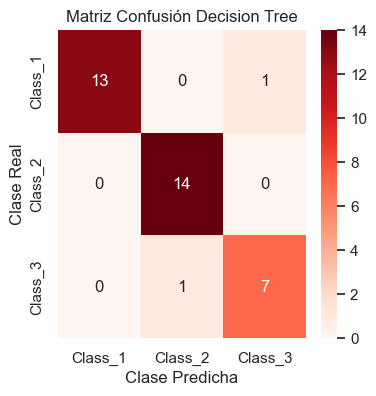

In [127]:
class_names = ['Class_1', 'Class_2', 'Class_3']

#heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap= 'Reds', xticklabels=class_names, yticklabels=class_names)


plt.title('Matriz Confusión Decision Tree')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

Con el modelo mejorado obtenemos la misma matriz de confusión. No hay cambios.

In [128]:
target_names = ['Class_1', 'Class_2', 'Class_3']
print(classification_report(y_test, y_pred_ct_1, target_names=target_names))

              precision    recall  f1-score   support

     Class_1       1.00      0.93      0.96        14
     Class_2       0.93      1.00      0.97        14
     Class_3       0.88      0.88      0.88         8

    accuracy                           0.94        36
   macro avg       0.94      0.93      0.93        36
weighted avg       0.95      0.94      0.94        36



Obtenemos los mismos resultados, no ha habido ni cambios ni mejora.  Realizaremos una validación cruzada.

### Validación cruzada:

In [129]:
# Realizamos validación cruzada
cv_scores_dt = cross_val_score(best_ct, X_train, y_train, cv=5, scoring='accuracy')

print("Resultados de Validación Cruzada:")
print("Precisión en cada pliegue:", cv_scores_dt)
print("Precisión media:", cv_scores_dt.mean())
print("Desviación estándar de la precisión:", cv_scores_dt.std())

Resultados de Validación Cruzada:
Precisión en cada pliegue: [0.82758621 0.93103448 0.92857143 1.         0.92857143]
Precisión media: 0.9231527093596059
Desviación estándar de la precisión: 0.05506234622588601


La valoración cruzada nos da una menor precisión, situándose en el 92,31%. Este será el valor que tomaremos por válido.

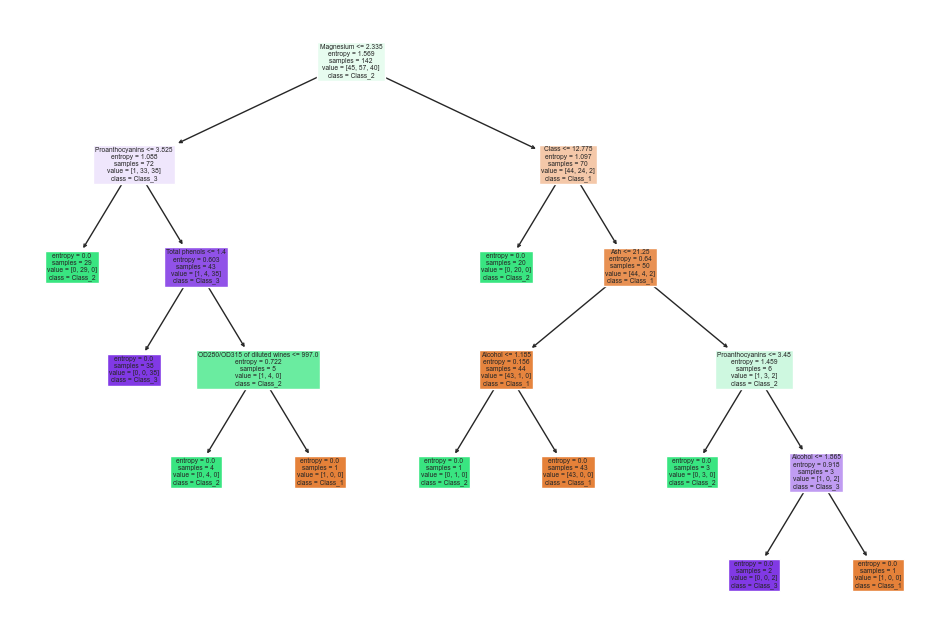

In [130]:
# Representación gráfica del Decision Tree Classifier.

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

target_names = ['Class_1', 'Class_2', 'Class_3']

plt.figure(figsize=(12, 8))
plot_tree(best_ct, feature_names=column_names, class_names=target_names, filled=True)
plt.show()

### ---> KNN classifier

In [131]:

# Incorporamos escalado: Configuramos el pipeline

pipeline_kn = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])


# Ajustamos el modelo KNN con pipeline
pipeline_kn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('minmax', MinMaxScaler(),
                                                  ['Alcohol', 'Total phenols',
                                                   'Flavanoids',
                                                   'Nonflavanoid phenols',
                                                   'OD280/OD315 of diluted '
                                                   'wines',
                                                   'Proline']),
                                                 ('robust', RobustScaler(),
                                                  ['Malic acid', 'Ash',
                                                   'Magnesium',
                                                   'Proanthocyanins',
                                                   'Color intensity', 'Hue']),
                                                 ('standard', StandardScaler(),
                                                  ['Alcalinity of ash'])])),
                ('knn', KNeighborsClassifier())])

In [132]:

# Realizamos predicciones en el conjunto de prueba
y_pred_kn = pipeline_kn.predict(X_test)

# Reporte de clasificación
target_names = ['Class_1', 'Class_2', 'Class_3']
print(classification_report(y_test, y_pred_kn, target_names=target_names))

              precision    recall  f1-score   support

     Class_1       0.87      0.93      0.90        14
     Class_2       1.00      0.79      0.88        14
     Class_3       0.80      1.00      0.89         8

    accuracy                           0.89        36
   macro avg       0.89      0.90      0.89        36
weighted avg       0.90      0.89      0.89        36



In [133]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_kn)
print("Matriz de confusión:")
print(cnf_matrix)

Matriz de confusión:
[[13  0  1]
 [ 2 11  1]
 [ 0  0  8]]


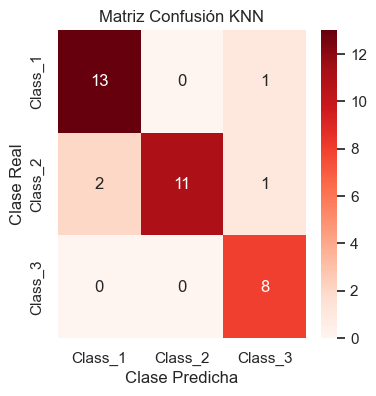

In [134]:
target_names = ['Class_1', 'Class_2', 'Class_3']

#heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap= 'Reds', xticklabels=target_names, yticklabels=target_names)


plt.title('Matriz Confusión KNN')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

13 muestras de la clase 1 fueron clasificadas correctamente, ninguna muestra de la clase 0 fue clasificada incorrectamente como clase 1, pero 1 muestra de la clase 1 fue clasificada incorrectamente como clase 3.

2 muestras de la clase 2 fueron clasificadas incorrectamente como clase 1, 11 muestras de la clase 2 fueron clasificadas correctamente, y 1 muestra de la clase 2 fue clasificada incorrectamente como clase 3.

Las 8 muestras de la clase 3 fueron clasificadas correctamente, sin errores.

In [135]:
# Realizamos predicciones en el conjunto de prueba
y_pred_kn = pipeline_kn.predict(X_test)

# Reporte de clasificación
target_names = ['Class_1', 'Class_2', 'Class_3']
print(classification_report(y_test, y_pred_kn, target_names=target_names))

              precision    recall  f1-score   support

     Class_1       0.87      0.93      0.90        14
     Class_2       1.00      0.79      0.88        14
     Class_3       0.80      1.00      0.89         8

    accuracy                           0.89        36
   macro avg       0.89      0.90      0.89        36
weighted avg       0.90      0.89      0.89        36



Este modelo KNN nos da unos primeros resultados inferiores a los obtenidos con el Decision Tree, la precisión es del 89%. Aún considerándose un buen indicador y por tanto modelo, no nos podemos quedar con este resultado sin hacer más pruebas. Pasaremos a realizar mejoras del modelo.

### Mejora del modelo:

In [136]:
pipeline_kn.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('minmax', MinMaxScaler(),
                                    ['Alcohol', 'Total phenols', 'Flavanoids',
                                     'Nonflavanoid phenols',
                                     'OD280/OD315 of diluted wines', 'Proline']),
                                   ('robust', RobustScaler(),
                                    ['Malic acid', 'Ash', 'Magnesium',
                                     'Proanthocyanins', 'Color intensity',
                                     'Hue']),
                                   ('standard', StandardScaler(),
                                    ['Alcalinity of ash'])])),
  ('knn', KNeighborsClassifier())],
 'verbose': False,
 'preprocessor': ColumnTransformer(transformers=[('minmax', MinMaxScaler(),
                                  ['Alcohol', 'Total phenols', 'Flavanoids',
                                   'Nonflavanoid phenols',
                     

In [137]:
param_grid_kn = {
    'knn__n_neighbors': [3, 5, 7, 9, 12],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__leaf_size': [10, 20, 30],
}


print(param_grid_kn)

{'knn__n_neighbors': [3, 5, 7, 9, 12], 'knn__weights': ['uniform', 'distance'], 'knn__p': [1, 2], 'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'knn__leaf_size': [10, 20, 30]}


In [138]:
# configuramos búsqueda en cuadrícula
grid_search_kn = GridSearchCV(pipeline_kn, param_grid_kn, cv=5, scoring='accuracy')


In [139]:
# búsqueda en cuadrícula en datos
grid_search_kn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('minmax',
                                                                         MinMaxScaler(),
                                                                         ['Alcohol',
                                                                          'Total '
                                                                          'phenols',
                                                                          'Flavanoids',
                                                                          'Nonflavanoid '
                                                                          'phenols',
                                                                          'OD280/OD315 '
                                                                          'of '
                                                                          'diluted '
                                                                          'wines',
                                                                          'Proline']),
                                                                        ('robust',
                                                                         RobustScaler(),
                                                                         ['Malic '
                                                                          'acid',
                                                                          'Ash',
                                                                          'Magnesium',
                                                                          'Proanthocyanins',
                                                                          'Color '
                                                                          'intensity',
                                                                          'Hue']),
                                                                        ('standard',
                                                                         StandardScaler(),
                                                                         ['Alcalinity '
                                                                          'of '
                                                                          'ash'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                            'brute'],
                         'knn__leaf_size': [10, 20, 30],
                         'knn__n_neighbors': [3, 5, 7, 9, 12], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [140]:
# mejor combinación de parámetros
best_params_kn = grid_search_kn.best_params_
print("Mejores parámetros:", best_params_kn)

# Obtenemos el mejor modelo
best_model_kn = grid_search_kn.best_estimator_

y_pred_kn_1 = best_model_kn.predict(X_test)

Mejores parámetros: {'knn__algorithm': 'auto', 'knn__leaf_size': 10, 'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'distance'}


In [141]:
# Matriz de confusión

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_kn_1)
print("Matriz de confusión:")
print(cnf_matrix)

Matriz de confusión:
[[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]


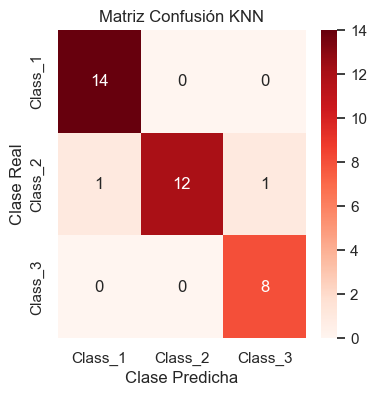

In [142]:
target_names_names = ['Class_1', 'Class_2', 'Class_3']

#heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap= 'Reds', xticklabels=target_names, yticklabels=target_names)


plt.title('Matriz Confusión KNN')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

Observamos una mejora en el modelo:

Las 14 muestras de la clase 1 fueron clasificadas correctamente, sin errores.

1 muestra de la clase 2 fue clasificada incorrectamente como clase 1, 12 muestras de la clase 1 fueron clasificadas correctamente, y 1 muestra de la clase 2 fue clasificada incorrectamente como clase 3.

Las 8 muestras de la clase 3 fueron clasificadas correctamente, sin errores.

In [143]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Realizamos predicciones en el conjunto de prueba con el mejor modelo
y_pred_kn_1 = best_model_kn.predict(X_test)

from sklearn.metrics import classification_report
target_names = ['Class_1', 'Class_2', 'Class_3']
print(classification_report(y_test, y_pred_kn_1, target_names=target_names))



              precision    recall  f1-score   support

     Class_1       0.93      1.00      0.97        14
     Class_2       1.00      0.86      0.92        14
     Class_3       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



El rendimiento del modelo ha mejorado, la precisión ha pasado a ser del 94%. 
Vamos a relizar una valoración cruzada, para evaluar el modelo de manera más robusta.

### Valoración cruzada:

In [144]:
# Realizamos validación cruzada
cv_scores_knn = cross_val_score(best_model_kn, X_train, y_train, cv=5, scoring='accuracy')


print("Resultados de Validación Cruzada:")
print("Precisión en cada pliegue:", cv_scores_knn)
print("Precisión media:", cv_scores_knn.mean())
print("Desviación estándar de la precisión:", cv_scores_knn.std())

Resultados de Validación Cruzada:
Precisión en cada pliegue: [0.96551724 0.96551724 0.92857143 1.         0.96428571]
Precisión media: 0.9647783251231526
Desviación estándar de la precisión: 0.022595753578679233


La precisión del modelo KNN Classifier tras realizar validación cruzada, ha mejorado y es del 96.48%.

### RANDOM FOREST CLASSIFIER

El modelo Random Forest no es sensible al escalado. No necesita estandarización de los datos.

In [145]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [146]:
y_pred_rf = rf_model.predict(X_test)

In [147]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)

print("Confusion matrix:")
print(cnf_matrix)

Confusion matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


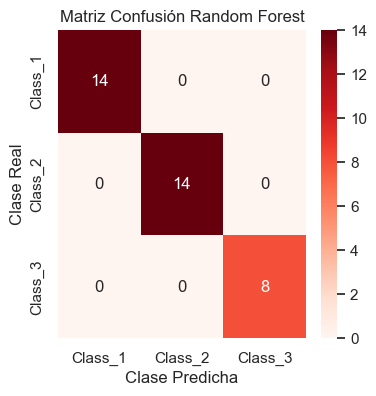

In [148]:

target_names = ['Class_1', 'Class_2', 'Class_3']

#heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap= 'Reds', xticklabels=target_names, yticklabels=target_names)


plt.title('Matriz Confusión Random Forest')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

Esta matriz de confusión indica un rendimiento perfecto del modelo, ya que todas las muestras fueron clasificadas correctamente en sus respectivas clases.

Esto nos debe hacer sospechar del resultado, podría estar sesgado entre otras razones.

In [149]:
from sklearn.metrics import classification_report
target_names = ['Class_1', 'Class_2', 'Class_3']
print(classification_report(y_test, y_pred_rf, target_names=target_names))

              precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        14
     Class_2       1.00      1.00      1.00        14
     Class_3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



Como era de esperar, el classification report del modelo Random Forest nos da un ajuste perfecto. Puede ser muy buen indicativo, pero por otro lado puede alojar dudas de que haya overfitting, o esté sesgado, por ejemplo. 

Haremos tests adicionales que nos den un indicativo real de la precisión del modelo. Buscaremos parámetros óptimos para conseguir el mejor modelo.

### Mejora del modelo:

In [150]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [151]:
param_grid_rf = {
    'n_estimators': [100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'random_state': [42],
}

In [152]:
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')

In [153]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5], 'n_estimators': [100],
                         'random_state': [42]},
             scoring='accuracy')

In [154]:
best_params_rf = grid_search_rf.best_params_
print("Mejores parámetros:", best_params_rf)

Mejores parámetros: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}


In [155]:
best_model_rf = grid_search_rf.best_estimator_

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Realizamos predicciones en el conjunto de prueba con el mejor modelo
y_pred_rf_1 = best_model_rf.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rf_1)

print("Confusion matrix:")
print(cnf_matrix)


Confusion matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


No se observan variaciones tras la mejora del modelo. El ajuste sigue siendo perfecto.

In [156]:
from sklearn.metrics import classification_report
target_names = ['Class_1', 'Class_2', 'Class_3']
print(classification_report(y_test, y_pred_rf_1, target_names=target_names))

              precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        14
     Class_2       1.00      1.00      1.00        14
     Class_3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



Tras ejecutar el modelo con los hiperparámetros más óptimos, el modelo sigue dando los mismos resultados de 100% de precisión en las clasificaciones. Debe haber un sobreajuste, veamos como se comporta el modelo mejorado al hacer una cross validation.

### Validación cruzada:

In [157]:
# Realizamos validación cruzada
cv_scores_rf = cross_val_score(best_model_rf, X_train, y_train, cv=5, scoring='accuracy')


print("Resultados de Validación Cruzada:")
print("Precisión en cada pliegue:", cv_scores_rf)
print("Precisión media:", cv_scores_rf.mean())
print("Desviación estándar de la precisión:", cv_scores_rf.std())

Resultados de Validación Cruzada:
Precisión en cada pliegue: [1.         1.         0.92857143 0.96428571 1.        ]
Precisión media: 0.9785714285714286
Desviación estándar de la precisión: 0.028571428571428557


Tras realizar la cross validation, comprobamos que la precisión del modelo Random Forest Classifier es realmente de un 97.86%. Nos quedamos con este rendimiento.

### ---> Support Vector Machines

In [158]:
# Incorporamos escalado: Configuramos el pipeline
pipeline_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('svm', SVC())
])


# Ajustamos el modelo SVM con pipeline
pipeline_svm.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('minmax', MinMaxScaler(),
                                                  ['Alcohol', 'Total phenols',
                                                   'Flavanoids',
                                                   'Nonflavanoid phenols',
                                                   'OD280/OD315 of diluted '
                                                   'wines',
                                                   'Proline']),
                                                 ('robust', RobustScaler(),
                                                  ['Malic acid', 'Ash',
                                                   'Magnesium',
                                                   'Proanthocyanins',
                                                   'Color intensity', 'Hue']),
                                                 ('standard', StandardScaler(),
                                                  ['Alcalinity of ash'])])),
                ('svm', SVC())])

In [159]:
# Realizamos predicciones en el conjunto de prueba
y_pred_svm = pipeline_svm.predict(X_test)


In [160]:

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm)
print("Confusion matrix:")
print(cnf_matrix)


Confusion matrix:
[[13  1  0]
 [ 1 13  0]
 [ 0  0  8]]


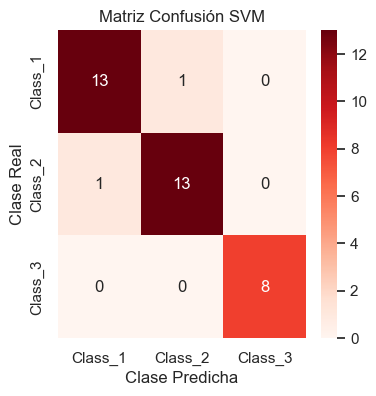

In [161]:
target_names = ['Class_1', 'Class_2', 'Class_3']

#heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap= 'Reds', xticklabels=target_names, yticklabels=target_names)


plt.title('Matriz Confusión SVM')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

La primera fila indica que 13 muestras de la clase 1 fueron clasificadas correctamente, y hubo 1 error al clasificar una muestra de la clase 1 como clase 2.

La segunda fila indica que 13 muestras de la clase 2 fueron clasificadas correctamente, y hubo 1 error al clasificar una muestra de la clase 2 como clase 1.

La tercera fila indica que todas las 8 muestras de la clase 3 fueron clasificadas correctamente, sin errores.

In [162]:
target_names = ['Class_1', 'Class_2', 'Class_3']
print(classification_report(y_test, y_pred_svm, target_names=target_names))

              precision    recall  f1-score   support

     Class_1       0.93      0.93      0.93        14
     Class_2       0.93      0.93      0.93        14
     Class_3       1.00      1.00      1.00         8

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



El reporte de clasificación nos da una precisión del 94%, como ya se esperaba tras visualizar la matriz de confusión del modelo. Buscaremos el mejor modelo con GridsearchCV.

### Mejora del modelo:

In [163]:
pipeline_svm.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('minmax', MinMaxScaler(),
                                    ['Alcohol', 'Total phenols', 'Flavanoids',
                                     'Nonflavanoid phenols',
                                     'OD280/OD315 of diluted wines', 'Proline']),
                                   ('robust', RobustScaler(),
                                    ['Malic acid', 'Ash', 'Magnesium',
                                     'Proanthocyanins', 'Color intensity',
                                     'Hue']),
                                   ('standard', StandardScaler(),
                                    ['Alcalinity of ash'])])),
  ('svm', SVC())],
 'verbose': False,
 'preprocessor': ColumnTransformer(transformers=[('minmax', MinMaxScaler(),
                                  ['Alcohol', 'Total phenols', 'Flavanoids',
                                   'Nonflavanoid phenols',
                                   'OD

In [164]:
param_grid_svm = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto'],  
    'svm__degree': [2, 3],  
    'svm__coef0': [0.0, 1.0],  
}

In [165]:
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring='accuracy')

In [166]:
grid_search_svm.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('minmax',
                                                                         MinMaxScaler(),
                                                                         ['Alcohol',
                                                                          'Total '
                                                                          'phenols',
                                                                          'Flavanoids',
                                                                          'Nonflavanoid '
                                                                          'phenols',
                                                                          'OD280/OD315 '
                                                                          'of '
                                                                          'diluted '
                                                                          'wines',
                                                                          'Proline']),
                                                                        ('robust',
                                                                         RobustScaler(),
                                                                         ['Malic '
                                                                          'acid',
                                                                          'Ash',
                                                                          'Magnesium',
                                                                          'Proanthocyanins',
                                                                          'Color '
                                                                          'intensity',
                                                                          'Hue']),
                                                                        ('standard',
                                                                         StandardScaler(),
                                                                         ['Alcalinity '
                                                                          'of '
                                                                          'ash'])])),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.1, 1, 10], 'svm__coef0': [0.0, 1.0],
                         'svm__degree': [2, 3], 'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [167]:
best_params_svm = grid_search_svm.best_params_
print("Mejores parámetros:", best_params_svm)

Mejores parámetros: {'svm__C': 1, 'svm__coef0': 0.0, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


In [168]:
best_model_svm = grid_search_svm.best_estimator_

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Realizamos predicciones en el conjunto de prueba con el mejor modelo:
y_pred_svm_1 = best_model_svm.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm_1)

print("Confusion matrix:")
print(cnf_matrix)

Confusion matrix:
[[13  1  0]
 [ 1 13  0]
 [ 0  0  8]]


No observamos ningún cambio tras mejorar el modelo.

In [169]:
from sklearn.metrics import classification_report
target_names = ['Class_1', 'Class_2', 'Class_3']
print(classification_report(y_test, y_pred_svm_1, target_names=target_names))

              precision    recall  f1-score   support

     Class_1       0.93      0.93      0.93        14
     Class_2       0.93      0.93      0.93        14
     Class_3       1.00      1.00      1.00         8

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



Los resultados son los mismos tras mejorar el modelo. Es un excelente modelo pero, de todas formas, realizaremos una validación cruzada que nos confirme su rendimiento.

### Validación cruzada:

In [170]:

cv_scores_svm = cross_val_score(best_model_svm, X_train, y_train, cv=5, scoring='accuracy')

print("Resultados de Validación Cruzada:")
print("Precisión en cada pliegue:", cv_scores_svm)
print("Precisión media:", cv_scores_svm.mean())
print("Desviación estándar de la precisión:", cv_scores_svm.std())

Resultados de Validación Cruzada:
Precisión en cada pliegue: [0.96551724 0.96551724 1.         0.92857143 0.96428571]
Precisión media: 0.9647783251231529
Desviación estándar de la precisión: 0.022595753578679233


La valoración cruzada nos da una precisión media del modelo Support Vector Machines es del 96.48%. Mejora el resultado del modelo mejorado.

### ---> LOGISTIC REGRESSION

In [171]:
# Incorporamos escalado: Configuramos el pipeline
pipeline_log = Pipeline([
    ('preprocessor', preprocessor),
    ('log_reg', LogisticRegression(random_state=42))
])


# Ajustamos el modelo SVM con pipeline
pipeline_log.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('minmax', MinMaxScaler(),
                                                  ['Alcohol', 'Total phenols',
                                                   'Flavanoids',
                                                   'Nonflavanoid phenols',
                                                   'OD280/OD315 of diluted '
                                                   'wines',
                                                   'Proline']),
                                                 ('robust', RobustScaler(),
                                                  ['Malic acid', 'Ash',
                                                   'Magnesium',
                                                   'Proanthocyanins',
                                                   'Color intensity', 'Hue']),
                                                 ('standard', StandardScaler(),
                                                  ['Alcalinity of ash'])])),
                ('log_reg', LogisticRegression(random_state=42))])

In [172]:

# Realizamos predicciones en el conjunto de prueba
y_pred_log = pipeline_log.predict(X_test)


In [173]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_log)
cnf_matrix

array([[14,  0,  0],
       [ 1, 12,  1],
       [ 0,  0,  8]])

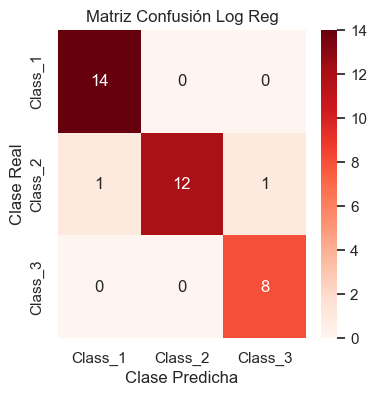

In [174]:
target_names = ['Class_1', 'Class_2', 'Class_3']

#heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap= 'Reds', xticklabels=target_names, yticklabels=target_names)


plt.title('Matriz Confusión Log Reg')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

Las 14 muestras de la clase 1 fueron clasificadas correctamente, sin errores.

1 muestra de la clase 2 fue clasificada incorrectamente como clase 1, 12 muestras de la clase 1 fueron clasificadas correctamente, y 1 muestra de la clase 2 fue clasificada incorrectamente como clase 3.

Las 8 muestras de la clase 3 fueron clasificadas correctamente, sin errores.

In [175]:
from sklearn.metrics import classification_report
target_names = ['Class_1', 'Class_2', 'Class_3']
print(classification_report(y_test, y_pred_log, target_names=target_names))

              precision    recall  f1-score   support

     Class_1       0.93      1.00      0.97        14
     Class_2       1.00      0.86      0.92        14
     Class_3       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



La precisión general del modelo es del 94%. Las métricas específicas para cada clase indican un buen equilibrio entre precision y recall. 
Deberemos de todas formas, como en los casos anteriores, seguir haciendo más ajustes y comprobaciones del modelo, antes de darlo por bueno.

### Mejora del modelo:

In [176]:
pipeline_log.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('minmax', MinMaxScaler(),
                                    ['Alcohol', 'Total phenols', 'Flavanoids',
                                     'Nonflavanoid phenols',
                                     'OD280/OD315 of diluted wines', 'Proline']),
                                   ('robust', RobustScaler(),
                                    ['Malic acid', 'Ash', 'Magnesium',
                                     'Proanthocyanins', 'Color intensity',
                                     'Hue']),
                                   ('standard', StandardScaler(),
                                    ['Alcalinity of ash'])])),
  ('log_reg', LogisticRegression(random_state=42))],
 'verbose': False,
 'preprocessor': ColumnTransformer(transformers=[('minmax', MinMaxScaler(),
                                  ['Alcohol', 'Total phenols', 'Flavanoids',
                                   'Nonflavanoid phenols',
    

In [177]:
param_grid_log = {
    'log_reg__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'log_reg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'log_reg__max_iter': [100, 500, 1000],
}

In [178]:
grid_search_log = GridSearchCV(pipeline_log, param_grid_log, cv=5, scoring='accuracy')

In [179]:
grid_search_log.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('minmax',
                                                                         MinMaxScaler(),
                                                                         ['Alcohol',
                                                                          'Total '
                                                                          'phenols',
                                                                          'Flavanoids',
                                                                          'Nonflavanoid '
                                                                          'phenols',
                                                                          'OD280/OD315 '
                                                                          'of '
                                                                          'diluted '
                                                                          'wines',
                                                                          'Proline']),
                                                                        ('robust',
                                                                         RobustScaler(),
                                                                         ['Malic '
                                                                          'acid',
                                                                          'Ash',
                                                                          'Magnesium',
                                                                          'Proanthocyanins',
                                                                          'Color '
                                                                          'intensity',
                                                                          'Hue']),
                                                                        ('standard',
                                                                         StandardScaler(),
                                                                         ['Alcalinity '
                                                                          'of '
                                                                          'ash'])])),
                                       ('log_reg',
                                        LogisticRegression(random_state=42))]),
             param_grid={'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'log_reg__max_iter': [100, 500, 1000],
                         'log_reg__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'log_reg__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                             'sag', 'saga']},
             scoring='accuracy')

In [180]:
best_params_log = grid_search_log.best_params_
print("Mejores parámetros:", best_params_log)

Mejores parámetros: {'log_reg__C': 10, 'log_reg__max_iter': 500, 'log_reg__penalty': 'l1', 'log_reg__solver': 'saga'}


In [181]:
best_model_log = grid_search_log.best_estimator_

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Realizamos predicciones en el conjunto de prueba con el mejor modelo
y_pred_log_1= best_model_log.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_log_1)
cnf_matrix

array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]])

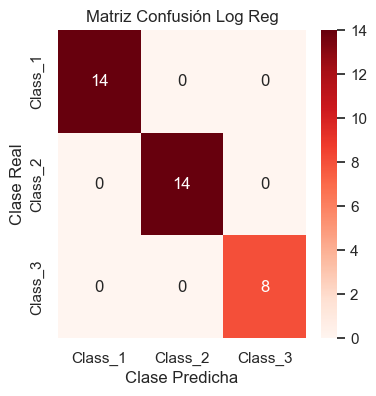

In [182]:
target_names = ['Class_1', 'Class_2', 'Class_3']

#heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap= 'Reds', xticklabels=class_names, yticklabels=class_names)


plt.title('Matriz Confusión Log Reg')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

El modelo mejorado nos da ahora una clasificación perfecta. Realiza clasificaciones sin errores.

In [183]:
from sklearn.metrics import classification_report
target_names = ['Class_1', 'Class_2', 'Class_3']
print(classification_report(y_test, y_pred_log_1, target_names=target_names))

              precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        14
     Class_2       1.00      1.00      1.00        14
     Class_3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



Conformamos que el modelo mejorado da una precisión del 100%, así como el resto de métricas. Es muy probable que sea debido a un sobreajuste de los datos, sesgo de una partición en concreto, etc. Realizaremos una validación cruzada.

### Validación cruzada:

In [184]:
cv_scores_log = cross_val_score(best_model_log, X_train, y_train, cv=5, scoring='accuracy')


print("Resultados de Validación Cruzada:")
print("Precisión en cada pliegue:", cv_scores_log)
print("Precisión media:", cv_scores_log.mean())
print("Desviación estándar de la precisión:", cv_scores_log.std())

Resultados de Validación Cruzada:
Precisión en cada pliegue: [1.         0.96551724 0.92857143 1.         1.        ]
Precisión media: 0.9788177339901478
Desviación estándar de la precisión: 0.02845227404570176


La valoración cruzada nos informa de que la precisión no es perfecta en 2 de los 5 folds.  Esto se ajusta más a la realidad. Podemos ahora confirmar que la precisión media del modelo es del 97.88%

### COMPARATIVA DE RESULTADOS ENTRE MODELOS - Conclusiones

In [185]:
# Resumen del rendimiento de los modelos:


df_scores = pd.DataFrame({
    'Modelo':['DT', 'KNN', 'RF', 'SVM', 'LR'],
    'Score': [cv_scores_dt.mean(), cv_scores_knn.mean(), cv_scores_rf.mean(), cv_scores_svm.mean(), cv_scores_log.mean()]})

df_scores_sorted = df_scores.sort_values(by='Score', ascending=False)
df_scores_sorted



,Modelo,Score
4,LR,0.978818
2,RF,0.978571
3,SVM,0.964778
1,KNN,0.964778
0,DT,0.923153


Todos los modelos tienen un excelente rendimiento en la predicción de clases, por encima del 96% en su mayoría, a excepción del Decision Tree que se queda con un 92.31% de precisión en la previsión de clases (el rendimiento es igualmente excelente).

El mejor modelo tras valoración cruzada es la Regresión Logarítmica con un 98.88%, seguido muy de cerca por el modelo Random Forest con un 97.86%.
Los modelos KNN y SVM dan exactamente el mismo rendimiento de 96.48%.
